In [2]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import sys
sys.path.append('/home/yangyuxi/QuantResearch/HKUquantDataSdk/')

In [ ]:
from HKUquantDataSdk import HKUquantDataSdk
ds = HKUquantDataSdk(user='group1', password='PASSWORD')

In [4]:
mkt_open = '9:30:00'
mkt_close = '15:00:00'
lunch_begin = '11:30:00'
lunch_end = '13:00:00'
photovoltaic_tickers = [
    '601012.SH', '688223.SH', '002459.SZ', '600438.SH', '688472.SH'
]
semiconductor_tickers = [
    '688981.SH', '600584.SH', '688008.SH', '688126.SH', '688041.SH'
]
comm_service_tickers = [
    '000839.SZ', '600050.SH', '601728.SH', '300310.SZ', '002123.SZ'
]
comm_device_tickers = [
    '600105.SH', '002583.SZ', '000063.SZ', '600734.SH', '600522.SH'
]
ticker_sectors = {
    "Photovoltaic": photovoltaic_tickers,
    "Semiconductor": semiconductor_tickers,
    "CommService": comm_service_tickers,
    "CommDevice": comm_device_tickers,
}
tickers = [t for ts in ticker_sectors.values() for t in ts]
date_range = ('2021-01-01', '2024-06-01')

In [5]:
def get_data(start_date: str, end_date: str) -> pd.DataFrame:
    return ds.get_mins_history(
        tickers=tickers,
        fields=['Open', 'Close', 'Low', 'High', 'TurnoverRatio', 'ChangeRatio', 'AccChangeRatio', 'Volume', 'SellVolume', 'BuyVolume', 'Amount'],
        start_date=start_date.replace('-', ''),
        end_date=end_date.replace('-', ''),
        begin_time=mkt_open,
        end_time=mkt_close,
        price_mode='REAL',
        source='stock',
    )

In [6]:
def get_eod_data(start_date: str, end_date: str) -> pd.DataFrame:
    return ds.get_eod_history(
        tickers=tickers,
        fields=['Open', 'PreClose', 'Volume', 'Amount', 'ChangeRatio', 'UpAndDownStatus'],
        start_date=start_date.replace('-', ''),
        end_date=end_date.replace('-', ''),
        price_mode='AFTER',
        source='stock',
    )

In [7]:
raw_data: pd.DataFrame = get_data(*date_range)
raw_data

ticker           TimeStamp   Open  Close    Low   High  \
0        000063.SZ 2021-01-04 09:30:00  33.00  33.00  33.00  33.00   
1        000063.SZ 2021-01-04 09:31:00  32.92  33.09  32.91  33.15   
2        000063.SZ 2021-01-04 09:32:00  33.10  33.27  33.09  33.28   
3        000063.SZ 2021-01-04 09:33:00  33.26  33.03  33.03  33.26   
4        000063.SZ 2021-01-04 09:34:00  33.03  32.94  32.90  33.03   
...            ...                 ...    ...    ...    ...    ...   
3632106  688981.SH 2024-05-31 14:56:00  44.84  44.87  44.83  44.87   
3632107  688981.SH 2024-05-31 14:57:00  44.88  44.87  44.87  44.89   
3632108  688981.SH 2024-05-31 14:58:00  44.87  44.87  44.87  44.87   
3632109  688981.SH 2024-05-31 14:59:00  44.87  44.87  44.87  44.87   
3632110  688981.SH 2024-05-31 15:00:00  44.85  44.85  44.85  44.85   

         TurnoverRatio  ChangeRatio     Volume  SellVolume  BuyVolume  \
0               0.0251      -1.9316   873500.0   3266760.0  5993840.0   
1               0.1050       0.2727  3650700.0   1125000.0   826000.0   
2               0.0297       0.5440  1031300.0   1205400.0  1015200.0   
3               0.0307      -0.7214  1068400.0   2366800.0  2045600.0   
4               0.0629      -0.2725  2185700.0   1512888.0   957568.0   
...                ...          ...        ...         ...        ...   
3632106         0.0081       0.0669   160506.0     85176.0    75330.0   
3632107         0.0093       0.0000   183208.0     99020.0    84188.0   
3632108         0.0000       0.0000        0.0         0.0        0.0   
3632109         0.0000       0.0000        0.0         0.0        0.0   
3632110         0.0172      -0.0446   339055.0    160682.0   178373.0   

               Amount  AccChangeRatio  
0        2.882550e+07       -1.931600  
1        1.205605e+08       -1.664167  
2        3.419059e+07       -1.129221  
3        3.543372e+07       -1.842474  
4        7.203795e+07       -2.109954  
...               ...             ...  
3632106  7.199000e+06       -1.145659  
3632107  8.221200e+06       -1.145659  
3632108  0.000000e+00       -1.145659  
3632109  0.000000e+00       -1.145659  
3632110  1.520660e+07       -1.189748  

[3632111 rows x 13 columns]

In [8]:
raw_eod_data: dict[str, pd.DataFrame] = get_eod_data(*date_range)
raw_eod_data

{'Open': ticker       000063.SZ  000839.SZ   002123.SZ  002459.SZ  002583.SZ  \
 TradingDay                                                            
 20210104    523.741020  53.587911  106.034880  54.288633  34.965674   
 20210105    539.294541  53.135693  104.640650  56.274802  35.190534   
 20210106    552.308712  52.457365  104.200367  55.255235  35.246749   
 20210107    528.502302  52.005146  102.732756  53.467683  34.178665   
 20210108    516.599097  49.291834   98.036401  53.984087  33.279227   
 ...                ...        ...         ...        ...        ...   
 20240527    440.547191  57.205660   59.647525  38.803651  23.094119   
 20240528    445.296585  56.301223   58.248386  38.410637  23.206773   
 20240529    441.857369  54.492349   57.732913  40.768725  22.981465   
 20240530    438.254380  55.849005   57.438358  41.803546  22.699829   
 20240531    440.219647  57.657879   57.953830  42.074998  22.868811   
 
 ticker      300310.SZ  600050.SH  600105.SH   600438.

In [9]:
eod_data = pd.DataFrame(
    [
        *[
            (
                ticker,
                dt.date(int(open_price[0][:4]), int(open_price[0][4:6]), int(open_price[0][6:])),
                (float(open_price_ticker) - float(pre_close_ticker)) / float(pre_close_ticker),
                change_ratio_ticker,
                up_and_down_statud_ticker,
                volume_ticker,
                amount_ticker,
            )
            for (
                open_price, pre_close,
                change_ratio, up_and_down_status,
                volume, amount
            )
            in zip(
                raw_eod_data['Open'].iterrows(), raw_eod_data['PreClose'].iterrows(),
                raw_eod_data['ChangeRatio'].iterrows(), raw_eod_data['UpAndDownStatus'].iterrows(),
                raw_eod_data['Volume'].iterrows(), raw_eod_data['Amount'].iterrows(),
            )
            for (
                (ticker, open_price_ticker), pre_close_ticker,
                change_ratio_ticker, up_and_down_statud_ticker,
                volume_ticker, amount_ticker,
            )
            in zip(
                open_price[1].items(), pre_close[1],
                change_ratio[1], up_and_down_status[1],
                volume[1], amount[1]
            )
        ]
    ],
    columns=[
        'ticker', 'TradingDay', 'Gap',
        'ChangeRatioEod', 'UpAndDownStatus',
        'VolumeEod', 'AmountEod',
    ],
).dropna()
eod_data

ticker  TradingDay       Gap  ChangeRatioEod  UpAndDownStatus  \
0      000063.SZ  2021-01-04 -0.019316          2.0208              0.0   
1      000839.SZ  2021-01-04  0.004237         -0.4237              0.0   
2      002123.SZ  2021-01-04  0.015460         -0.0703              0.0   
3      002459.SZ  2021-01-04  0.006876          5.8448              0.0   
4      002583.SZ  2021-01-04  0.013029          2.9316              0.0   
...          ...         ...       ...             ...              ...   
16495  688041.SH  2024-05-31  0.007049          2.5752              0.0   
16496  688126.SH  2024-05-31 -0.003636         -1.6000              0.0   
16497  688223.SH  2024-05-31  0.001248          1.7478              0.0   
16498  688472.SH  2024-05-31  0.007937          0.8730              0.0   
16499  688981.SH  2024-05-31 -0.006389         -1.1897              0.0   

        VolumeEod    AmountEod  
0      1296473.46  4343079.819  
1       203126.76    47738.487  
2       136619.85   195826.158  
3       266837.69  1133036.774  
4       210921.78   131773.140  
...           ...          ...  
16495   123476.12   870882.762  
16496   134177.34   182706.655  
16497   650584.31   524969.824  
16498   110623.78   140888.847  
16499   314630.49  1414729.533  

[15108 rows x 7 columns]

In [10]:
def get_index_data(start_date: str, end_date: str) -> pd.DataFrame:
    return ds.get_eod_history(
        tickers=['000001.SH'],
        fields=['Open', 'PreClose', 'Volume', 'Amount', 'ChangeRatio'],
        start_date=start_date.replace('-', ''),
        end_date=end_date.replace('-', ''),
        price_mode='AFTER',
        source='index',
    )

In [11]:
raw_index_eod_data = get_index_data(*date_range)
raw_index_eod_data

{'Open': StockIndexCode  000001.SH
 TradingDay               
 20210104        3474.6793
 20210105        3492.1912
 20210106        3530.9072
 20210107        3552.9087
 20210108        3577.6923
 ...                   ...
 20240527        3094.1400
 20240528        3122.3877
 20240529        3108.0267
 20240530        3103.7078
 20240531        3094.7587
 
 [825 rows x 1 columns],
 'PreClose': StockIndexCode  000001.SH
 TradingDay               
 20210104        3473.0693
 20210105        3502.9584
 20210106        3528.6767
 20210107        3550.8767
 20210108        3576.2046
 ...                   ...
 20240527        3088.8705
 20240528        3124.0427
 20240529        3109.5721
 20240530        3111.0176
 20240531        3091.6778
 
 [825 rows x 1 columns],
 'Volume': StockIndexCode    000001.SH
 TradingDay                 
 20210104        380790800.0
 20210105        407995934.0
 20210106        370230926.0
 20210107        405348226.0
 20210108        345557896.0
 ...       

In [12]:
import datetime as dt

# Get index gap per date
index_eod_data = pd.DataFrame(
    [
        (
            dt.date(int(open_price[0][:4]), int(open_price[0][4:6]), int(open_price[0][6:])),
            (float(open_price[1].iloc[0]) - float(pre_close[1].iloc[0])) / float(pre_close[1].iloc[0]),
            change_ratio[1].iloc[0],
        )
        for open_price, pre_close, change_ratio
        in zip(raw_index_eod_data['Open'].iterrows(), raw_index_eod_data['PreClose'].iterrows(), raw_index_eod_data['ChangeRatio'].iterrows())
    ],
    columns=['TradingDay', 'IndexGap', 'IndexChangeRatioEod'],
)
index_eod_data[:10]

TradingDay  IndexGap  IndexChangeRatioEod
0  2021-01-04  0.000464               0.8606
1  2021-01-05 -0.003074               0.7342
2  2021-01-06  0.000632               0.6291
3  2021-01-07  0.000572               0.7133
4  2021-01-08  0.000416              -0.1705
5  2021-01-11  0.000340              -1.0815
6  2021-01-12 -0.003819               2.1759
7  2021-01-13  0.001370              -0.2685
8  2021-01-14 -0.003812              -0.9100
9  2021-01-15  0.000107               0.0133

In [13]:
data = raw_data.merge(eod_data, left_on=(raw_data['TimeStamp'].dt.date, 'ticker'), right_on=('TradingDay', 'ticker'))

data = data.merge(index_eod_data, left_on=raw_data['TimeStamp'].dt.date, right_on='TradingDay')

data['Time'] = data['TimeStamp'].dt.time

data['DayOfWeek'] = data['TimeStamp'].dt.weekday

def find_sector(t: str) -> str:
    for s, ts in ticker_sectors.items():
        if t in ts:
            return s
    raise
data['Sector'] = data['ticker'].transform(find_sector)

data['AccChangeRatio'] = data['AccChangeRatio'] - data['Gap'] * 100

df_idx_cols = ['ticker', 'Sector', 'TimeStamp', 'TradingDay', 'DayOfWeek', 'Time']
index_cols = ['IndexGap']
min_cols = ['Open', 'Close', 'Low', 'High', 'TurnoverRatio', 'ChangeRatio', 'Volume', 'SellVolume', 'BuyVolume', 'Amount', 'AccChangeRatio']
eod_cols = ['Gap', 'ChangeRatioEod', 'UpAndDownStatus', 'VolumeEod', 'AmountEod']
all_cols = df_idx_cols + index_cols + min_cols + eod_cols

data = data[all_cols]

data

ticker         Sector           TimeStamp  TradingDay  DayOfWeek  \
0        000063.SZ     CommDevice 2021-01-04 09:30:00  2021-01-04          0   
1        000063.SZ     CommDevice 2021-01-04 09:31:00  2021-01-04          0   
2        000063.SZ     CommDevice 2021-01-04 09:32:00  2021-01-04          0   
3        000063.SZ     CommDevice 2021-01-04 09:33:00  2021-01-04          0   
4        000063.SZ     CommDevice 2021-01-04 09:34:00  2021-01-04          0   
...            ...            ...                 ...         ...        ...   
3632106  688981.SH  Semiconductor 2024-05-31 14:56:00  2024-05-31          4   
3632107  688981.SH  Semiconductor 2024-05-31 14:57:00  2024-05-31          4   
3632108  688981.SH  Semiconductor 2024-05-31 14:58:00  2024-05-31          4   
3632109  688981.SH  Semiconductor 2024-05-31 14:59:00  2024-05-31          4   
3632110  688981.SH  Semiconductor 2024-05-31 15:00:00  2024-05-31          4   

             Time  IndexGap   Open  Close    Low  ...     Volume  SellVolume  \
0        09:30:00  0.000464  33.00  33.00  33.00  ...   873500.0   3266760.0   
1        09:31:00  0.000464  32.92  33.09  32.91  ...  3650700.0   1125000.0   
2        09:32:00  0.000464  33.10  33.27  33.09  ...  1031300.0   1205400.0   
3        09:33:00  0.000464  33.26  33.03  33.03  ...  1068400.0   2366800.0   
4        09:34:00  0.000464  33.03  32.94  32.90  ...  2185700.0   1512888.0   
...           ...       ...    ...    ...    ...  ...        ...         ...   
3632106  14:56:00  0.000997  44.84  44.87  44.83  ...   160506.0     85176.0   
3632107  14:57:00  0.000997  44.88  44.87  44.87  ...   183208.0     99020.0   
3632108  14:58:00  0.000997  44.87  44.87  44.87  ...        0.0         0.0   
3632109  14:59:00  0.000997  44.87  44.87  44.87  ...        0.0         0.0   
3632110  15:00:00  0.000997  44.85  44.85  44.85  ...   339055.0    160682.0   

         BuyVolume        Amount  AccChangeRatio       Gap  ChangeRatioEod  \
0        5993840.0  2.882550e+07        0.000049 -0.019316          2.0208   
1         826000.0  1.205605e+08        0.267482 -0.019316          2.0208   
2        1015200.0  3.419059e+07        0.802429 -0.019316          2.0208   
3        2045600.0  3.543372e+07        0.089175 -0.019316          2.0208   
4         957568.0  7.203795e+07       -0.178304 -0.019316          2.0208   
...            ...           ...             ...       ...             ...   
3632106    75330.0  7.199000e+06       -0.506752 -0.006389         -1.1897   
3632107    84188.0  8.221200e+06       -0.506752 -0.006389         -1.1897   
3632108        0.0  0.000000e+00       -0.506752 -0.006389         -1.1897   
3632109        0.0  0.000000e+00       -0.506752 -0.006389         -1.1897   
3632110   178373.0  1.520660e+07       -0.550841 -0.006389         -1.1897   

         UpAndDownStatus   VolumeEod    AmountEod  
0                    0.0  1296473.46  4343079.819  
1                    0.0  1296473.46  4343079.819  
2                    0.0  1296473.46  4343079.819  
3                    0.0  1296473.46  4343079.819  
4                    0.0  1296473.46  4343079.819  
...                  ...         ...          ...  
3632106              0.0   314630.49  1414729.533  
3632107              0.0   314630.49  1414729.533  
3632108              0.0   314630.49  1414729.533  
3632109              0.0   314630.49  1414729.533  
3632110              0.0   314630.49  1414729.533  

[3632111 rows x 23 columns]

In [14]:
def get_stats(model: LinearRegression, X, y) -> pd.DataFrame:
    lm = model
    lm.fit(X,y)
    params = np.append(lm.intercept_,lm.coef_)
    predictions = lm.predict(X)

    # newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    newX = np.append(np.ones((len(X),1)), X, axis=1)
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

    df = pd.DataFrame()
    df["Coeff"],df["StdErr"],df["T"],df["P"] = [params,sd_b,ts_b,p_values]

    return df

In [15]:
def draw_line(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = x_vals * slope + intercept
    plt.plot(x_vals, y_vals, color='black')

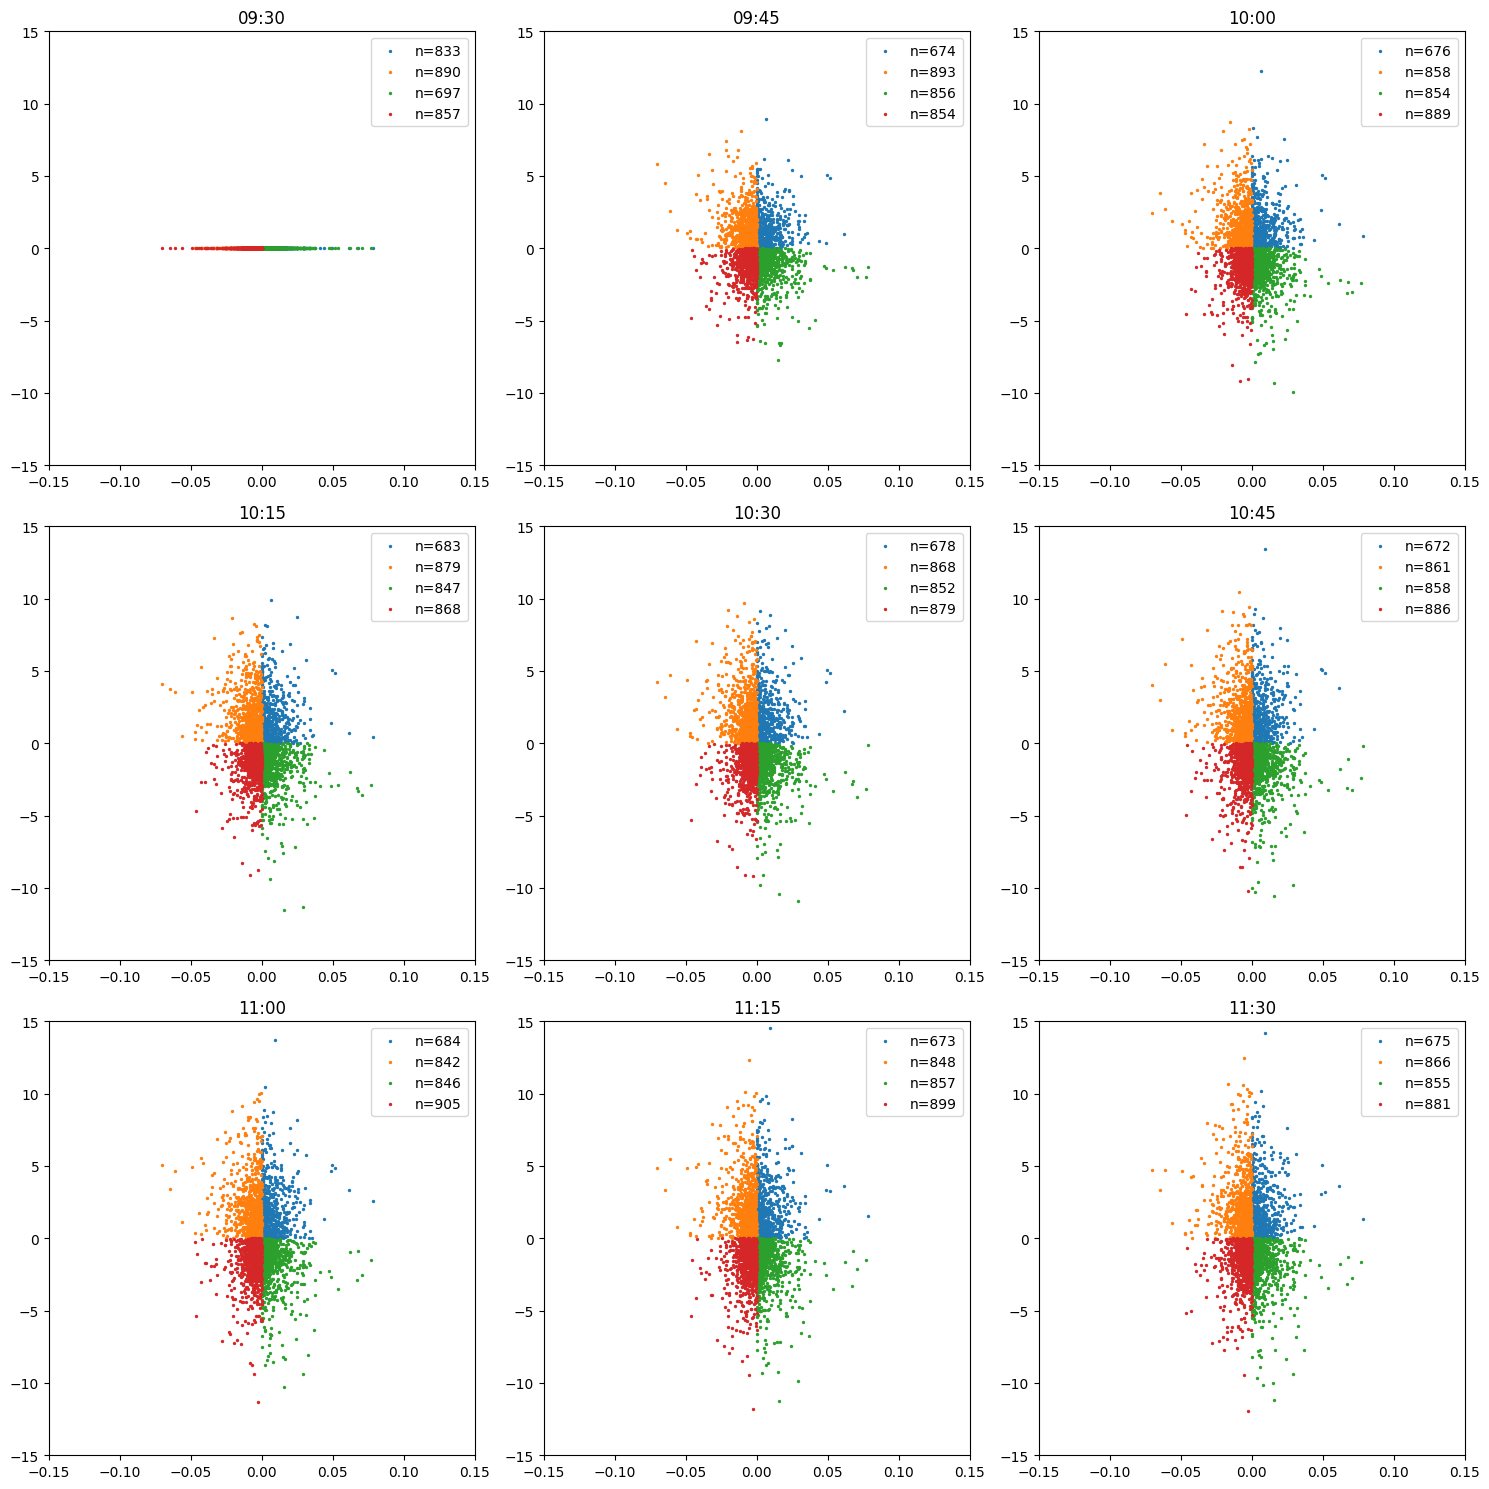

In [16]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

d = d[(d['Sector'] == 'Photovoltaic')]

plt.figure(figsize=(15, 15))

for i in range(9):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 15)
    ).time()

    dq = d[(d['Time'] == time)]

    x = dq['Gap'].to_frame()
    y = dq['AccChangeRatio']

    model = LinearRegression()
    model.fit(x, y)
    model_stats = get_stats(model, x.to_numpy(), y.to_numpy())

    plt.subplot(3, 3, i + 1)

    title_time = time.strftime('%H:%M')
    title_t = ', '.join(model_stats['T'].astype(int).astype(str))
    title_p = ', '.join(model_stats['P'].round(2).astype(str))
    plt.title(f'{title_time}')

    plt.ylim(-15, 15)
    plt.xlim(-0.15, 0.15)

    # For different sectors visualization
    # for s, dqq in dq.groupby('Sector'):
    #     plt.scatter(
    #         dqq['Gap'],
    #         dqq['AccChangeRatio'],
    #         s=2,
    #         label=f'{s} (n={len(dqq)})'
    #     )
    # plt.legend()

    dqq = dq[(dq['Gap'] >= 0) & (dq['AccChangeRatio'] >= 0)]
    plt.scatter(
        dqq['Gap'],
        dqq['AccChangeRatio'],
        s=2,
        label=f'n={len(dqq)}'
    )
    dqq = dq[(dq['Gap'] < 0) & (dq['AccChangeRatio'] >= 0)]
    plt.scatter(
        dqq['Gap'],
        dqq['AccChangeRatio'],
        s=2,
        label=f'n={len(dqq)}'
    )
    dqq = dq[(dq['Gap'] >= 0) & (dq['AccChangeRatio'] < 0)]
    plt.scatter(
        dqq['Gap'],
        dqq['AccChangeRatio'],
        s=2,
        label=f'n={len(dqq)}'
    )
    dqq = dq[(dq['Gap'] < 0) & (dq['AccChangeRatio'] < 0)]
    plt.scatter(
        dqq['Gap'],
        dqq['AccChangeRatio'],
        s=2,
        label=f'n={len(dqq)}'
    )

    plt.legend()

plt.tight_layout()
plt.show()

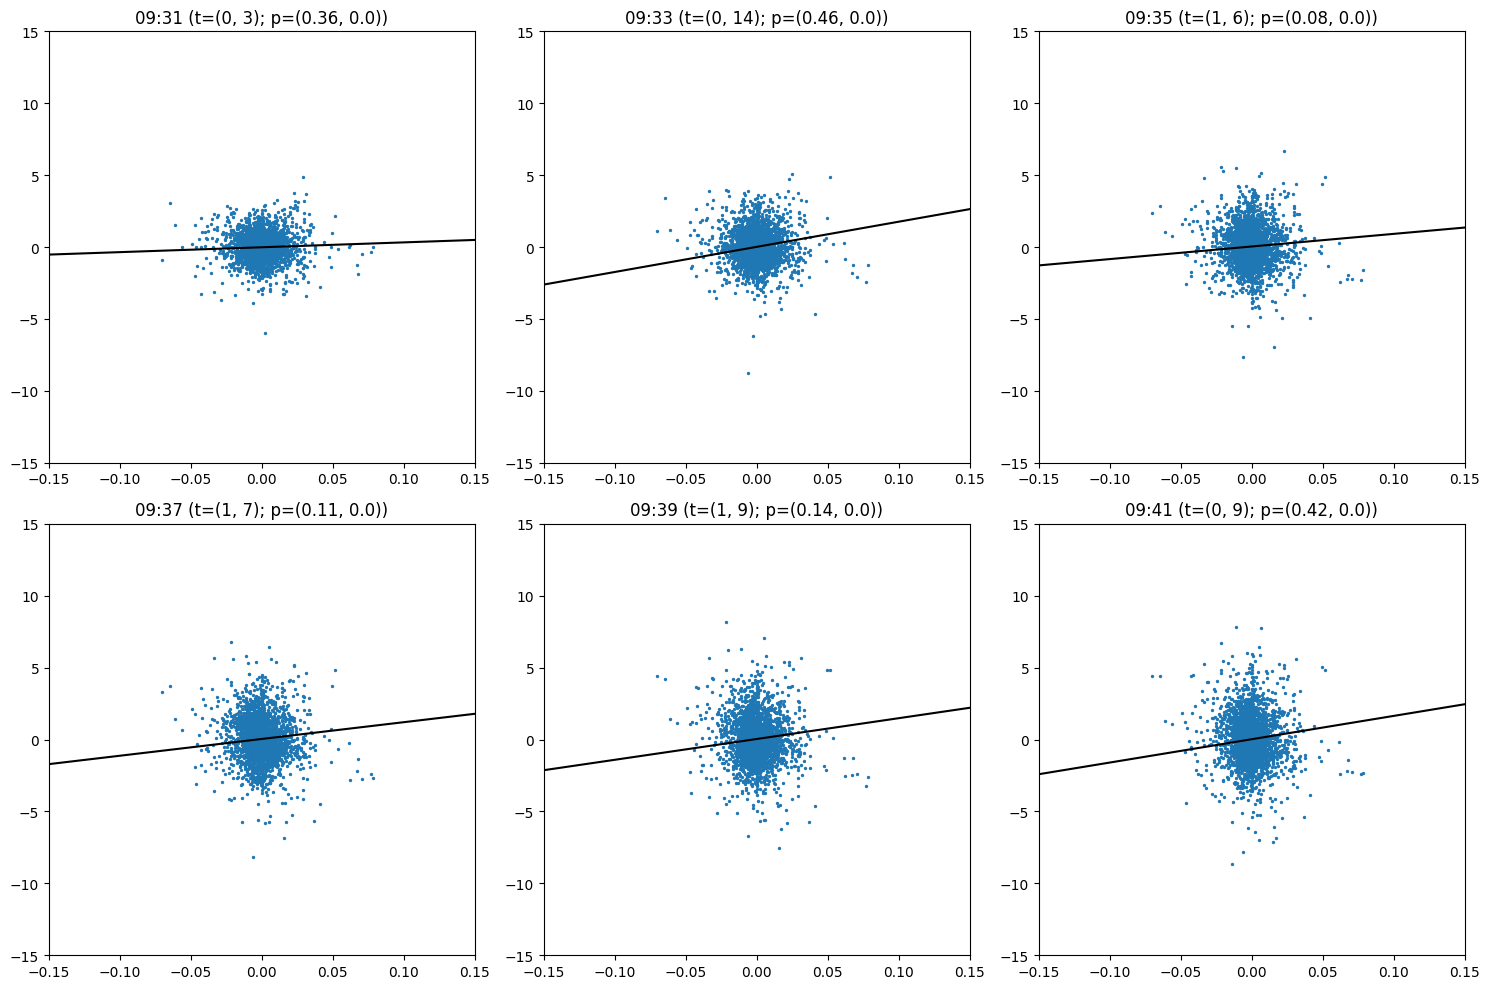

In [17]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

d = d[(d['Sector'] == 'Photovoltaic')]

plt.figure(figsize=(15, 10))

for i in range(6):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 2 + 1)
    ).time()

    dq = d[(d['Time'] == time)]

    x = dq['Gap'].to_frame()
    y = dq['AccChangeRatio']

    model = LinearRegression()
    model.fit(x, y)
    model_stats = get_stats(model, x.to_numpy(), y.to_numpy())

    plt.subplot(2, 3, i + 1)

    title_time = time.strftime('%H:%M')
    title_t = ', '.join(model_stats['T'].astype(int).astype(str))
    title_p = ', '.join(model_stats['P'].round(2).astype(str))
    plt.title(f'{title_time} (t=({title_t}); p=({title_p}))')

    plt.ylim(-15, 15)
    plt.xlim(-0.15, 0.15)

    # For different sectors visualization
    # for s, dqq in dq.groupby('Sector'):
    #     plt.scatter(
    #         dqq['Gap'],
    #         dqq['AccChangeRatio'],
    #         s=2,
    #         label=f'{s} (n={len(dqq)})'
    #     )
    # plt.legend()

    plt.scatter(
        x,
        y,
        s=2,
    )

    draw_line(model.coef_, model.intercept_)

plt.tight_layout()
plt.show()

In [18]:
from typing import Generator, Optional, Callable

pd.options.mode.chained_assignment = None

def backtest(
    df: pd.DataFrame,
    action: Callable[[pd.DataFrame], float],
    time: Optional[dt.time] = None,
) -> Generator[tuple[str, float, float, float], None, None]:
    if time is not None:
        df = df[(df['Time'] == time)]

    # -1 - short, 1 - long
    df['Action'] = action(df)
    df['Return'] = df['AccChangeRatio'] * df['Action']

    acc_strat = 0
    acc = 0
    ex_acc = 0
    for day, d in df.groupby('TradingDay'):
        acc_strat += d['Return'].sum()
        acc += d['AccChangeRatio'].sum()
        ex_acc += d['Return'].sum() - d['AccChangeRatio'].sum()
        yield (day, acc_strat, acc, ex_acc)

In [19]:
def strat1(df: pd.DataFrame) -> pd.Series:
    def _strat(gap: float) -> float:
        if gap > 0:
            return -1
        elif gap < 0:
            return 1
        else:
            return 0
    return df['Gap'].transform(_strat)

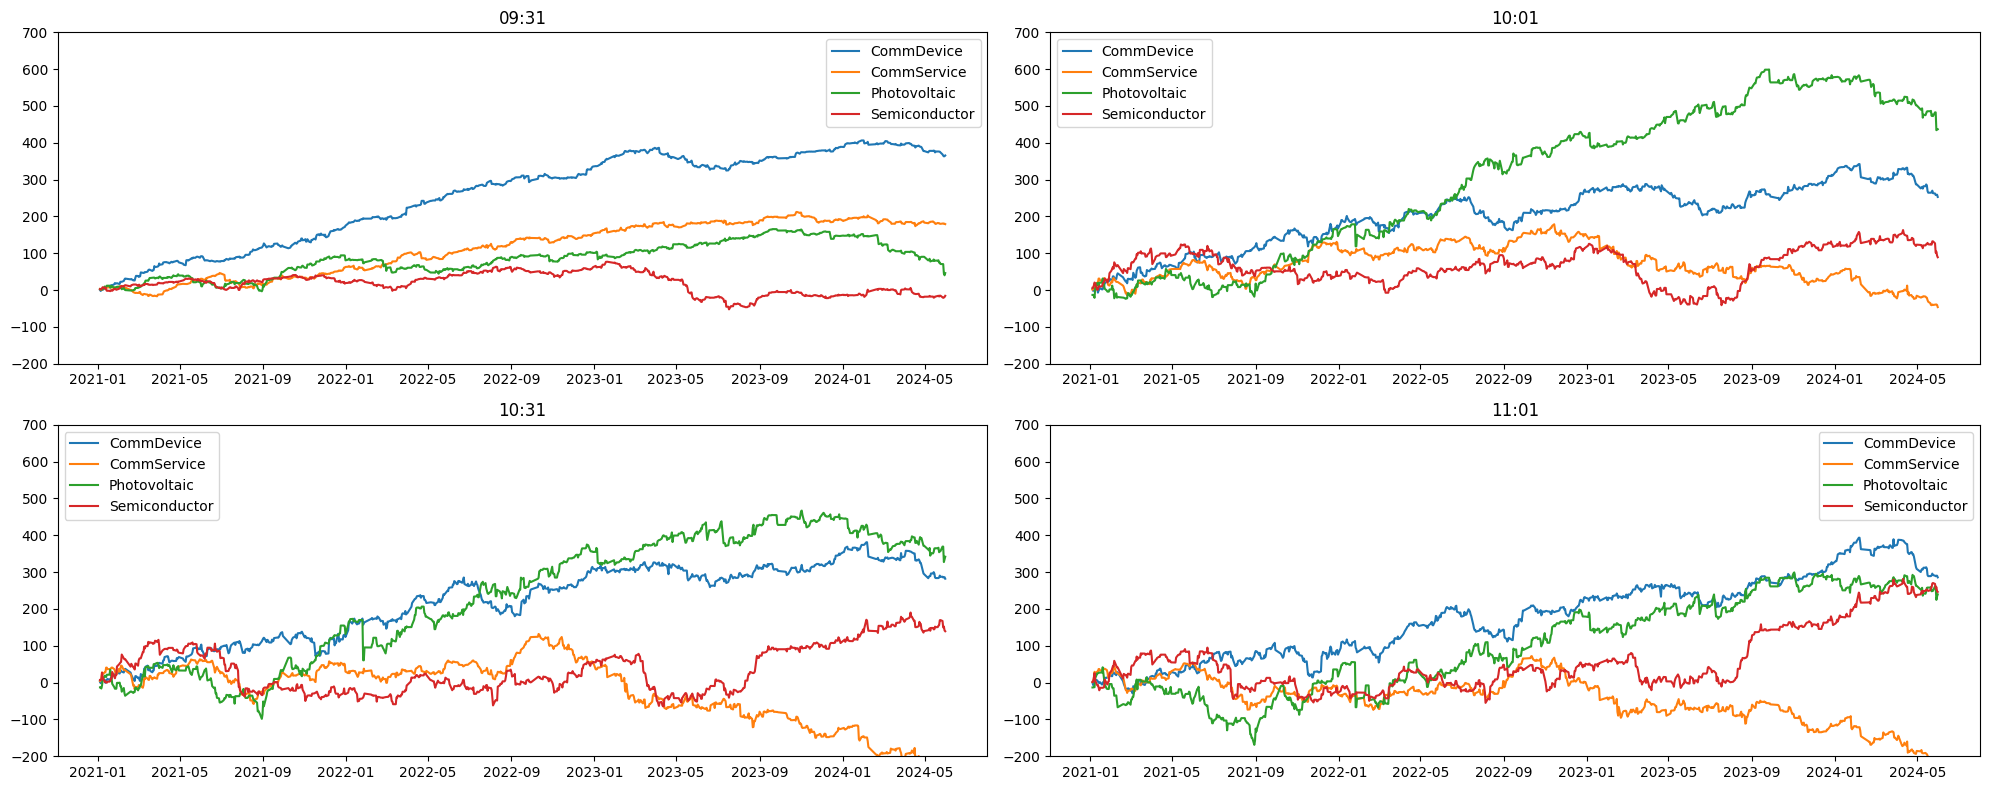

In [20]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

plt.figure(figsize=(20, 8))

for i in range(4):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(9, 30))
        + dt.timedelta(minutes = i * 30 + 1)
    ).time()

    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    plt.subplot(2, 2, i + 1)

    time_label = time.strftime('%H:%M')
    plt.title(time_label)

    plt.ylim(-200, 700)
    
    for i, (s, dd) in enumerate(d.groupby('Sector')):
        results = list(backtest(dd, strat1, time = time))

        days = np.fromiter((day for day, _, _, _ in results), dtype=dt.date)
        returns_strat = np.fromiter((acc for _, acc, _, _ in results), dtype=np.float32)
        returns = np.fromiter((acc for _, _, acc, _ in results), dtype=np.float32)
        excess_returns = np.fromiter((acc for _, _, _, acc in results), dtype=np.float32)

        color = colors[i]

        plt.plot(
            days,
            excess_returns,
            linestyle='-',
            color=color,
            label=f'{s}',
        )

    plt.legend()

plt.tight_layout()
plt.show()

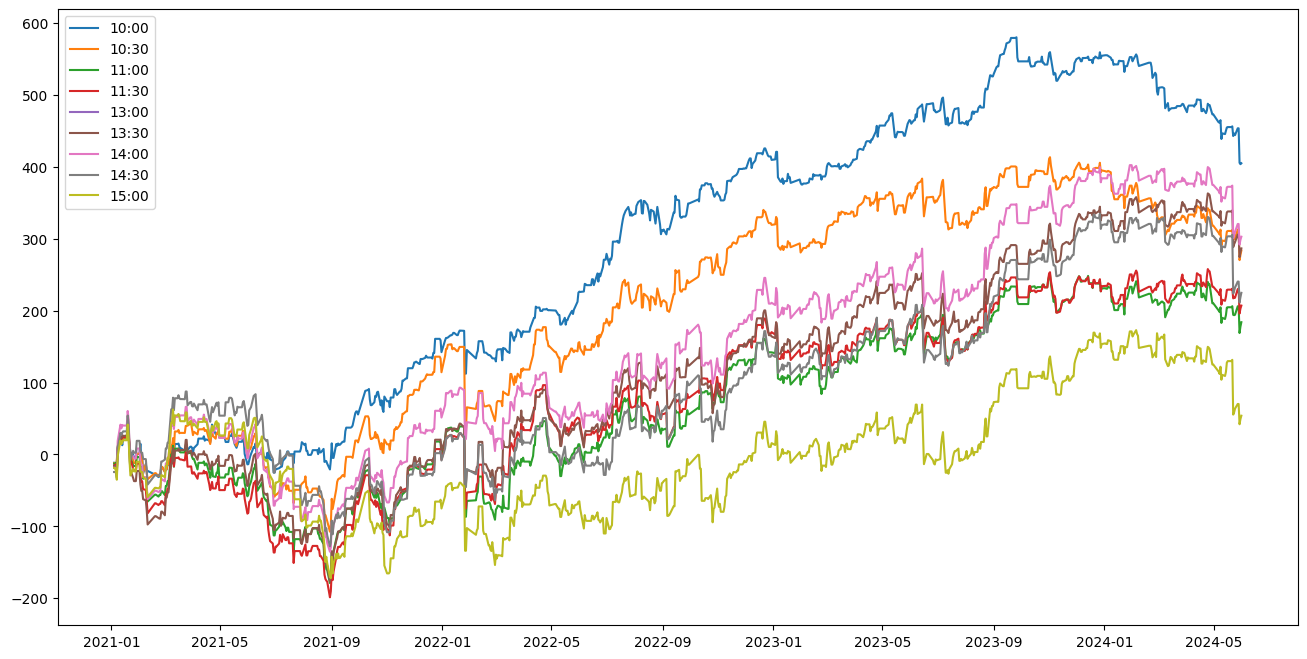

In [28]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

d = d[(d['Sector'] == 'Photovoltaic')]

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(16, 8))

j = 0
for i in range(11):
    time = (
        dt.datetime.combine(dt.date.today(), dt.time(10, 00))
        + dt.timedelta(minutes = i * 30)
    ).time()

    if dt.time(11, 30) < time < dt.time(13, 00):
        continue

    time_label = time.strftime('%H:%M')
    
    results = list(backtest(d, strat1, time = time))

    days = np.fromiter((day for day, _, _, _ in results), dtype=dt.date)
    returns_strat = np.fromiter((acc for _, acc, _, _ in results), dtype=np.float32)
    returns = np.fromiter((acc for _, _, acc, _ in results), dtype=np.float32)
    excess_returns = np.fromiter((acc for _, _, _, acc in results), dtype=np.float32)

    color = colors[j]

    plt.plot(
        days,
        excess_returns,
        linestyle='-',
        color=color,
        label=f'{time_label}',
    )

    j += 1

plt.legend()
plt.show()

In [123]:
from typing import Any, Iterable


def draw_with_backtest(
    group: Iterable[tuple[str, pd.DataFrame]],
    strat: Callable[[pd.DataFrame], pd.Series],
    timing_strat: Optional[Callable[[pd.DataFrame], dt.time]] = None,
    get_color: Optional[Callable[[str], Any]] = None,
    acc: bool = True,
    is_subplot: bool = False,
    has_legend: bool = True,
):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    if not is_subplot:
        plt.figure(figsize=(16, 8))

    if acc:
        plt.ylim(-100, 250)

    for i, (ticker, dd) in enumerate(group):
        results = list(backtest(dd, strat))

        days = np.fromiter((day for day, _, _, _ in results), dtype=dt.date)
        returns_strat = np.fromiter((acc for _, acc, _, _ in results), dtype=np.float32)
        returns = np.fromiter((acc for _, _, acc, _ in results), dtype=np.float32)
        excess_returns = np.fromiter((acc for _, _, _, acc in results), dtype=np.float32)

        if get_color is None:
            color = colors[i % len(colors)]
        else:
            color = get_color(ticker)

        y = excess_returns if acc else dd['AccChangeRatio']

        plt.plot(
            days,
            y,
            linestyle='-',
            color=color,
            label=f'{ticker}',
        )

    if has_legend:
        plt.legend()
    if not is_subplot:
        plt.show()

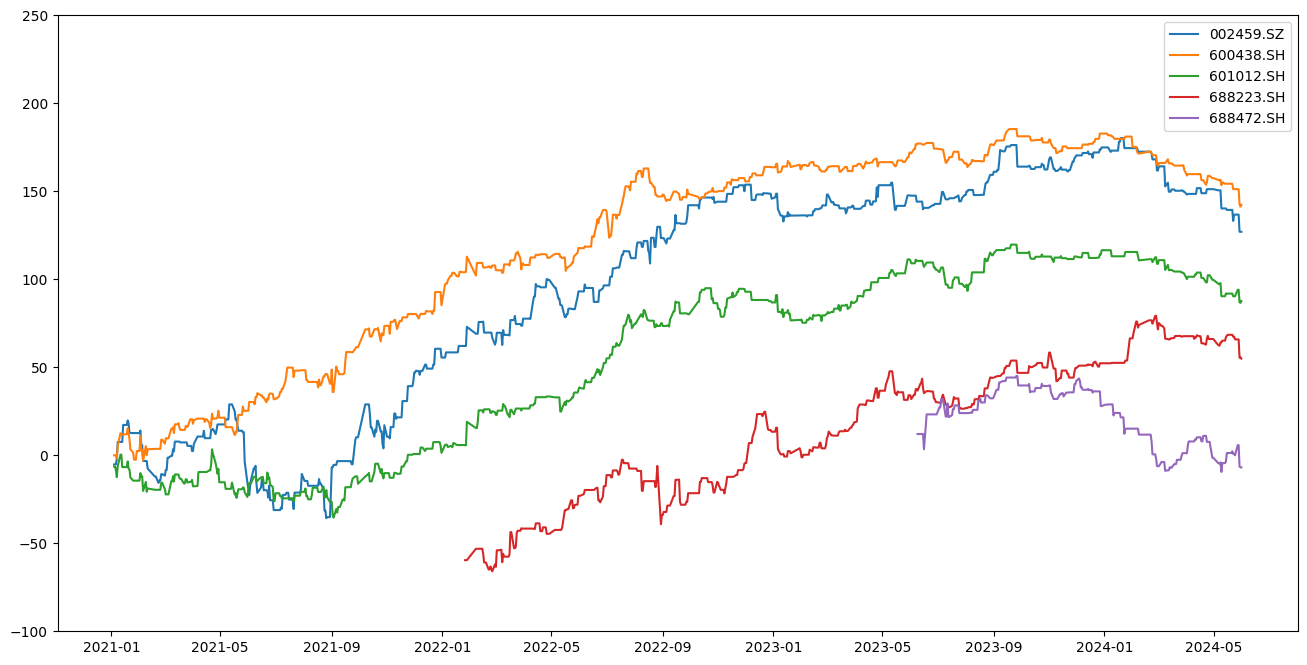

In [59]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]

draw_with_backtest(d.groupby('ticker'), strat1)

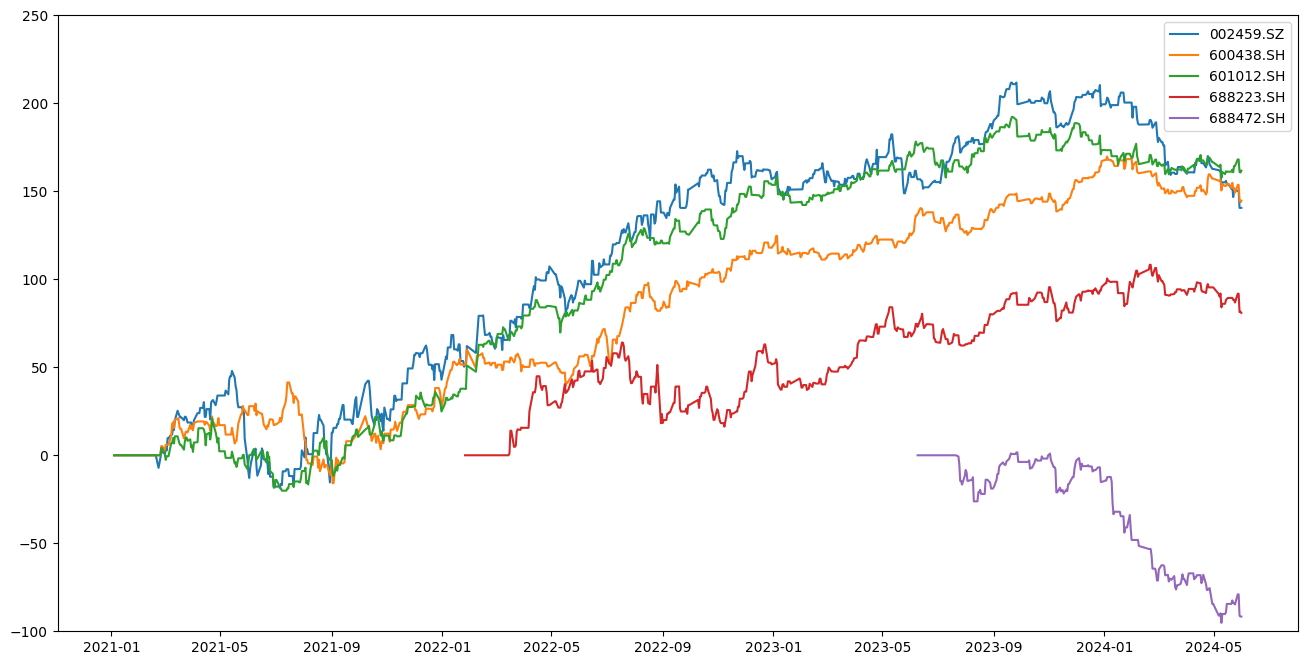

In [110]:
def strat2(df: pd.DataFrame) -> pd.Series:
    def _strat(x: pd.DataFrame) -> pd.Series:
        gap = x['Gap']
        rank = x['Gap30DaysRank']

        if rank > 10 / 30:
            return -1
        else:
            return 1
    
    return df[['Gap', 'Gap30DaysRank']].apply(_strat, axis=1)

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]


dg = {
    ticker: dd
    for ticker, dd in d.groupby('ticker')
}

for ticker in dg:
    dg[ticker]['Gap30DaysRank'] = dg[ticker]['Gap'].rolling(window=30).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

draw_with_backtest(dg.items(), strat2)

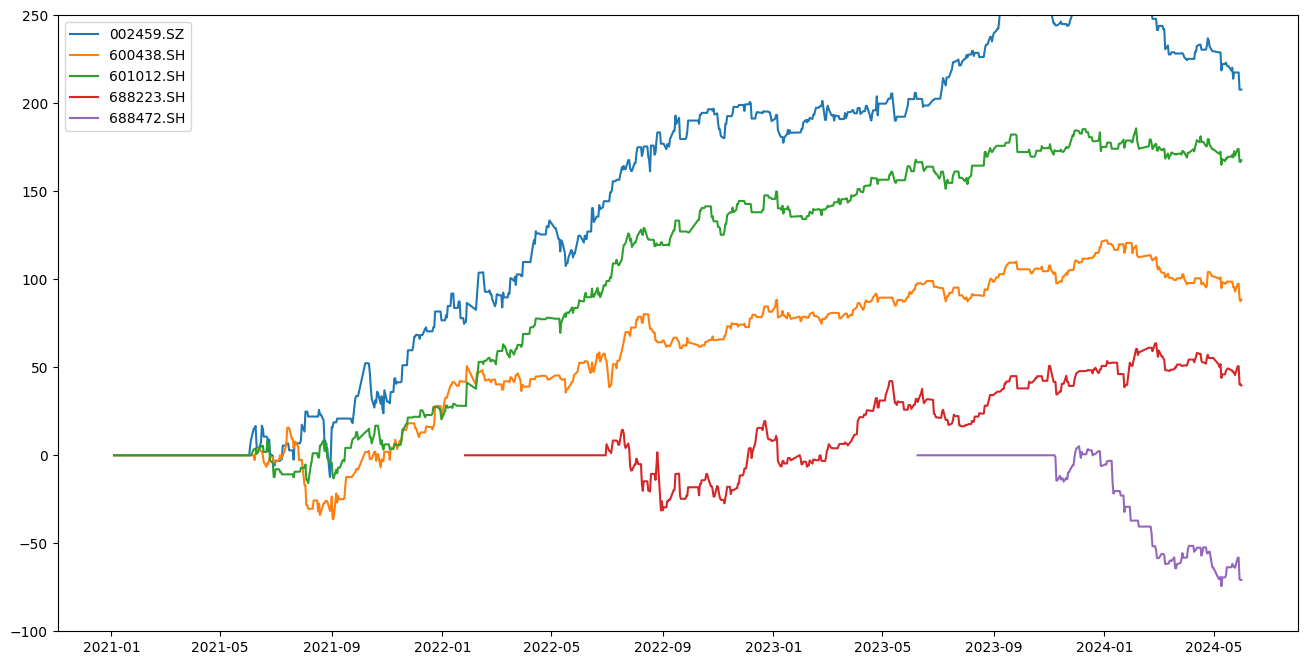

In [111]:
def strat3(df: pd.DataFrame) -> pd.Series:
    def _strat(x: pd.DataFrame) -> pd.Series:
        gap = x['Gap']
        rank = x['Gap100DaysRank']

        if rank > 40 / 100:
            return -1
        else:
            return 1
    
    return df[['Gap', 'Gap100DaysRank']].apply(_strat, axis=1)

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]


dg = {
    ticker: dd
    for ticker, dd in d.groupby('ticker')
}

for ticker in dg:
    dg[ticker]['Gap100DaysRank'] = dg[ticker]['Gap'].rolling(window=100).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

draw_with_backtest(dg.items(), strat3)

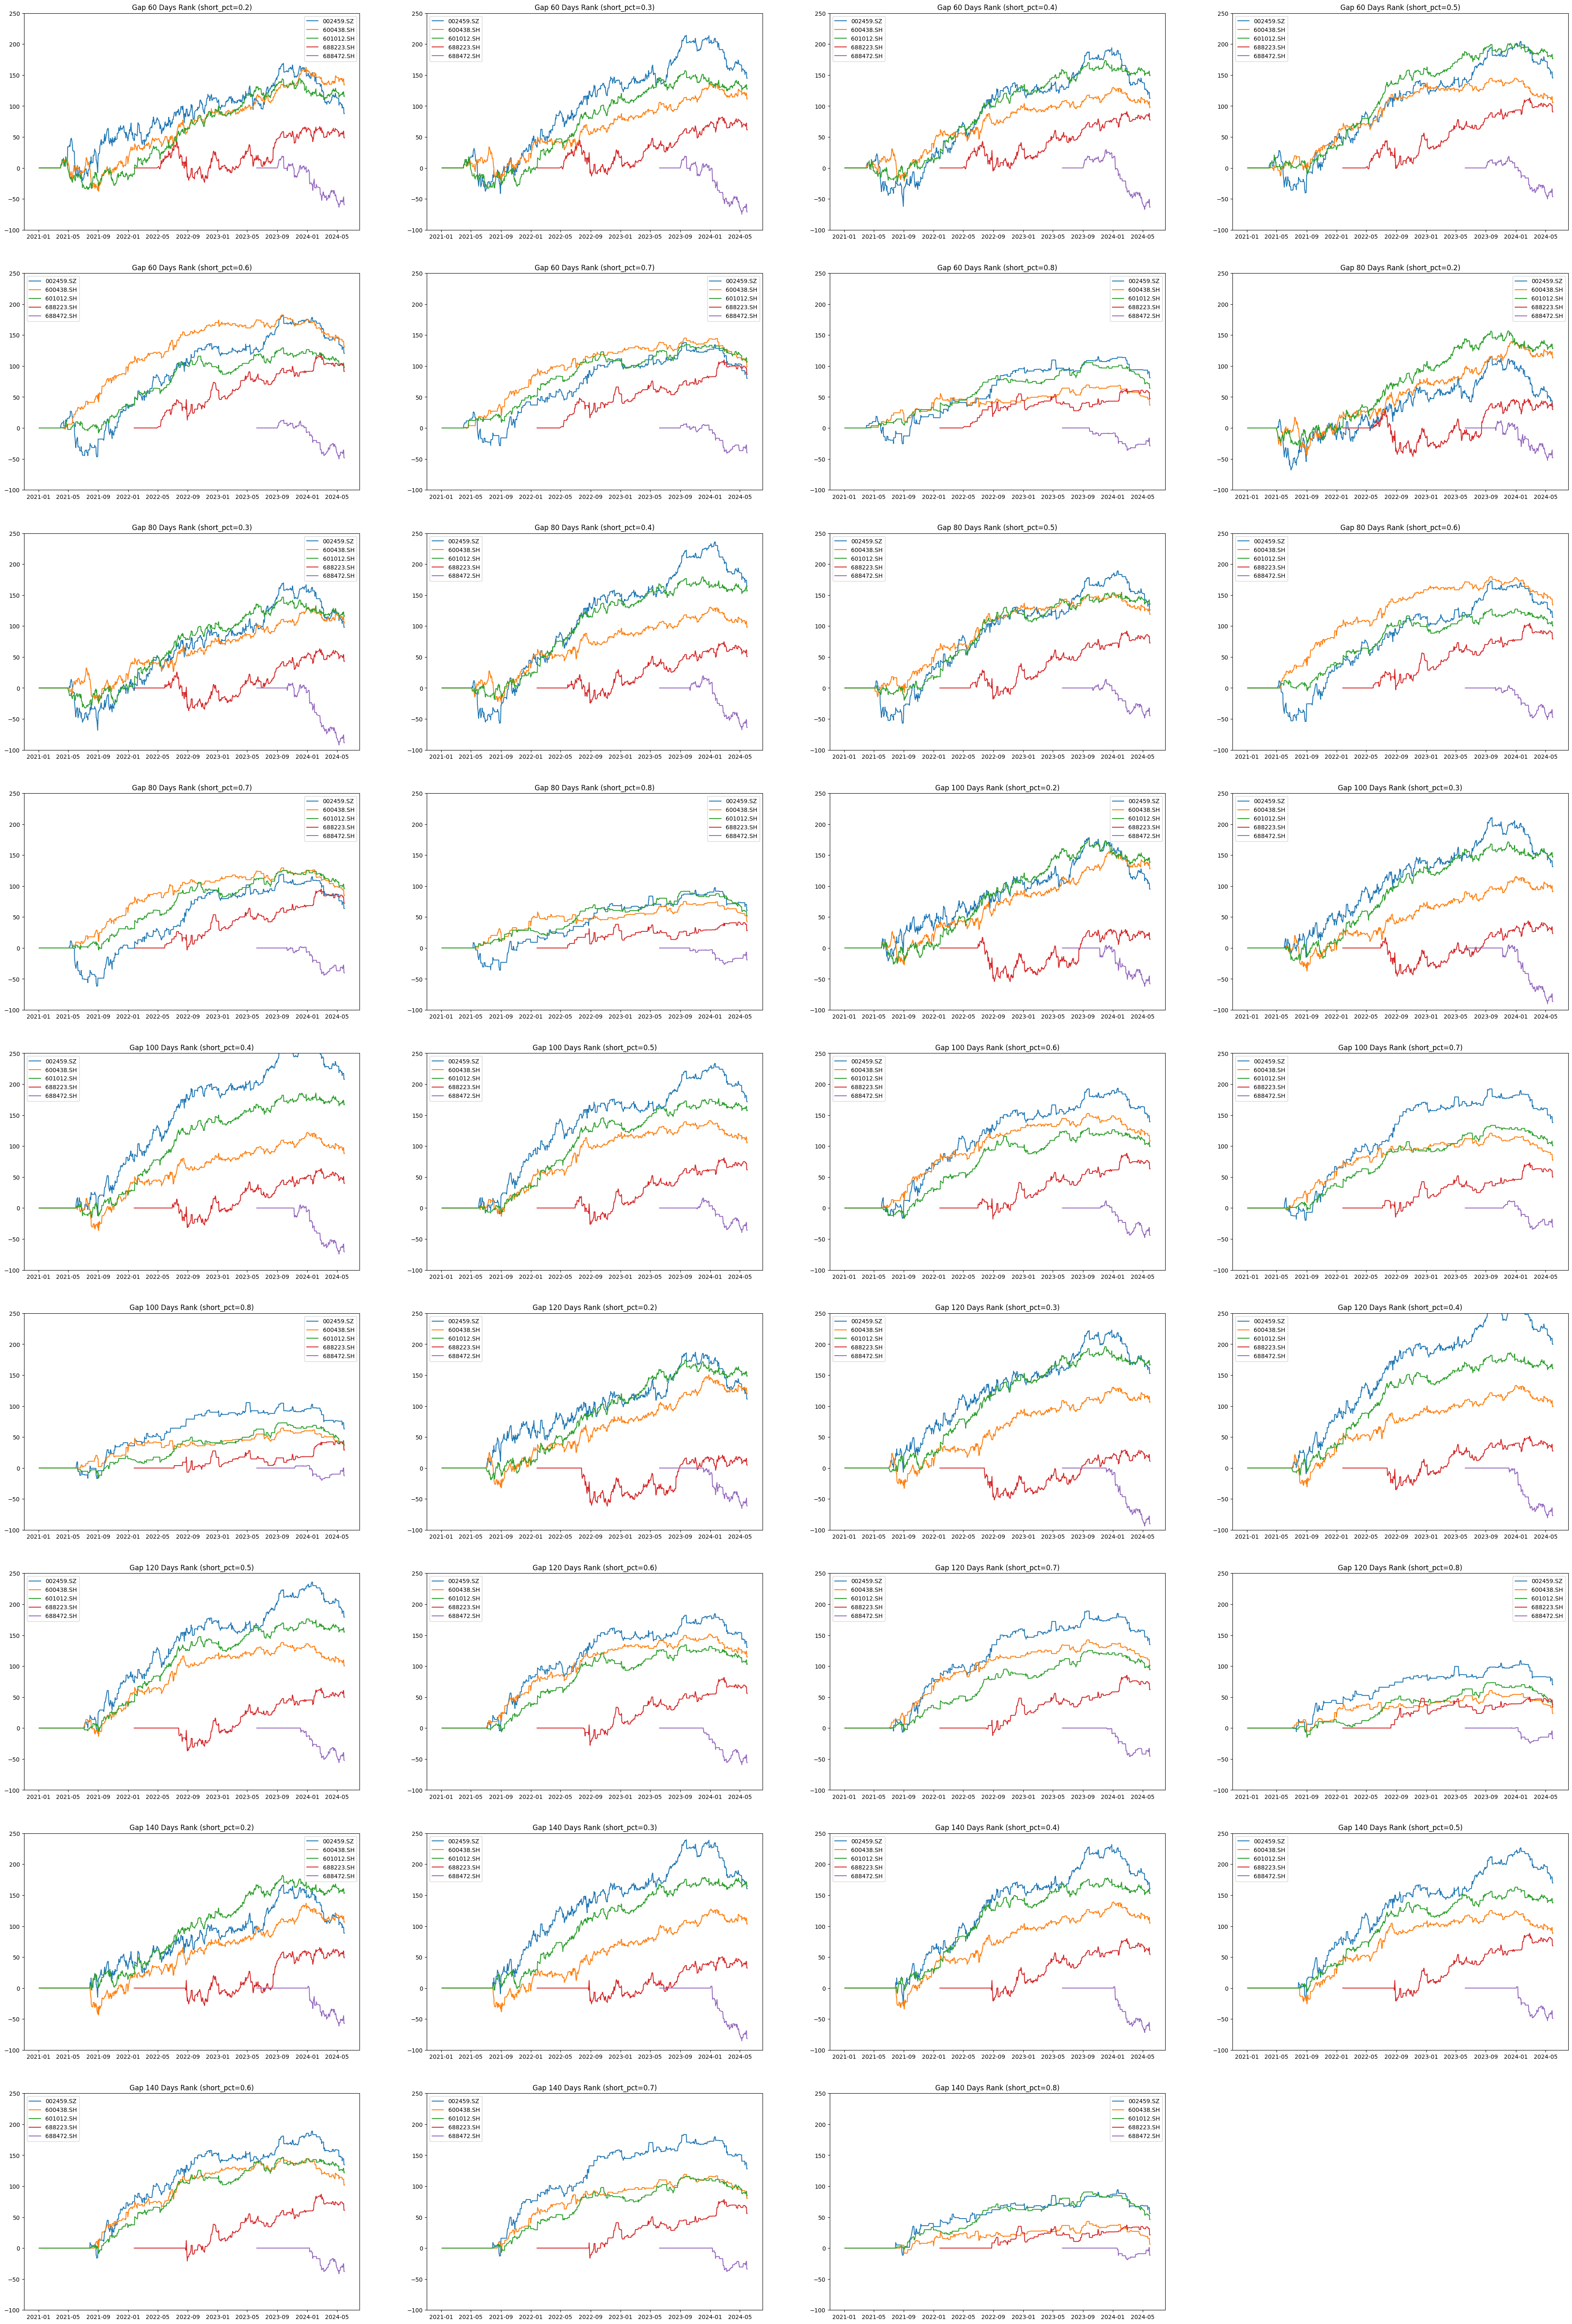

In [ ]:
def meta_strat4(n: int, short_pct: float, long_pct: float):
    def strat4(df: pd.DataFrame) -> pd.Series:
        def _strat(x: pd.DataFrame) -> pd.Series:
            gap = x['Gap']
            rank = x['GapNDaysRank']

            if rank > short_pct:
                return -1
            else:
                return 1
        
        return df[['Gap', 'GapNDaysRank']].apply(_strat, axis=1)

    d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'AccChangeRatio']]

    d = d[
        (d['Sector'] == 'Photovoltaic') &
        (d['Time'] == dt.time(hour=10, minute=00))
    ]


    dg = {
        ticker: dd
        for ticker, dd in d.groupby('ticker')
    }

    for ticker in dg:
        dg[ticker]['GapNDaysRank'] = dg[ticker]['Gap'].rolling(window=n).apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])

    draw_with_backtest(dg.items(), strat4, is_subplot=True)

plt.figure(figsize=(12 * 4, 8 * 10))

i = 0
for n in np.arange(60, 141, 20):
    for short_pct in np.arange(0.2, 0.8, 0.1):
        i += 1
        long_pct = 1.0 - short_pct
        plt.subplot(10, 4, i) 
        plt.title(f'Gap {n} Days Rank (short_pct={np.round(short_pct, 1)})')
        meta_strat4(n, short_pct, long_pct)

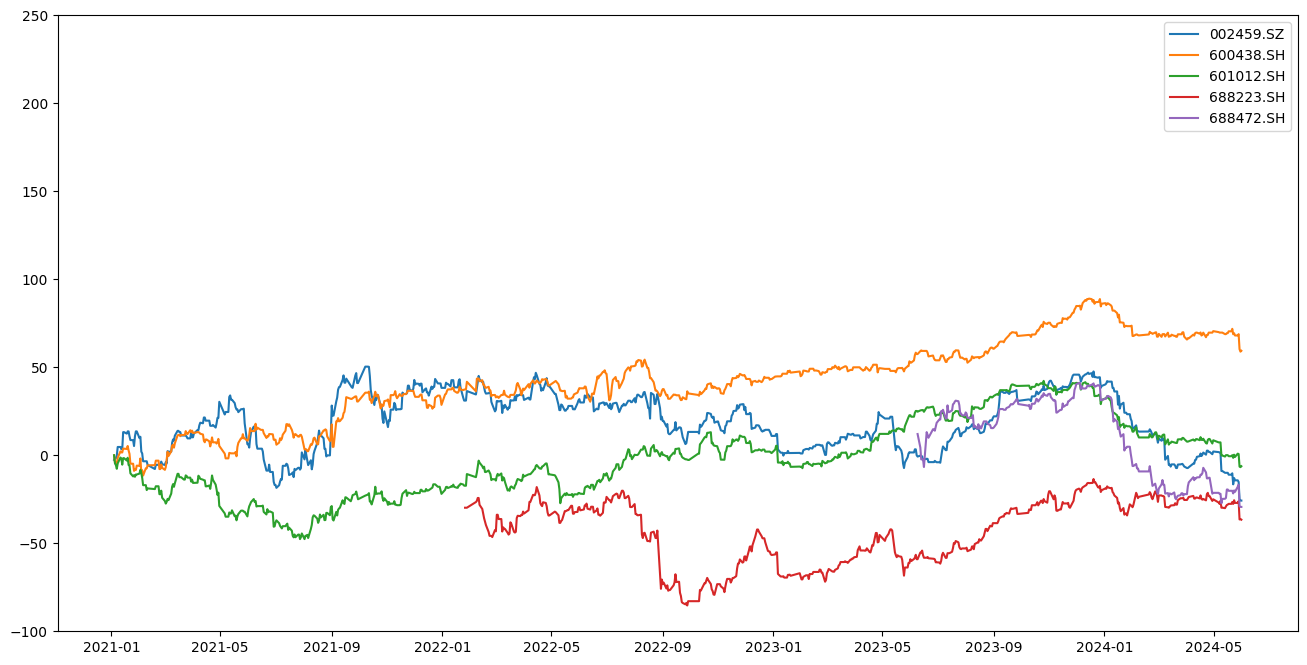

In [121]:
def strat5(df: pd.DataFrame) -> pd.Series:
    def _strat(x: pd.DataFrame) -> pd.Series:
        gap = x['Gap']
        index_gap = x['IndexGap']

        if gap > 0:
            if index_gap <= 0:
                return -1
            else:
                return -0
        elif gap < 0:
            if index_gap >= 0:
                return 1
            else:
                return 0
        else:
            return 1
    
    return df[['Gap', 'IndexGap']].apply(_strat, axis=1)

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'IndexGap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]

draw_with_backtest(d.groupby('ticker'), strat5)

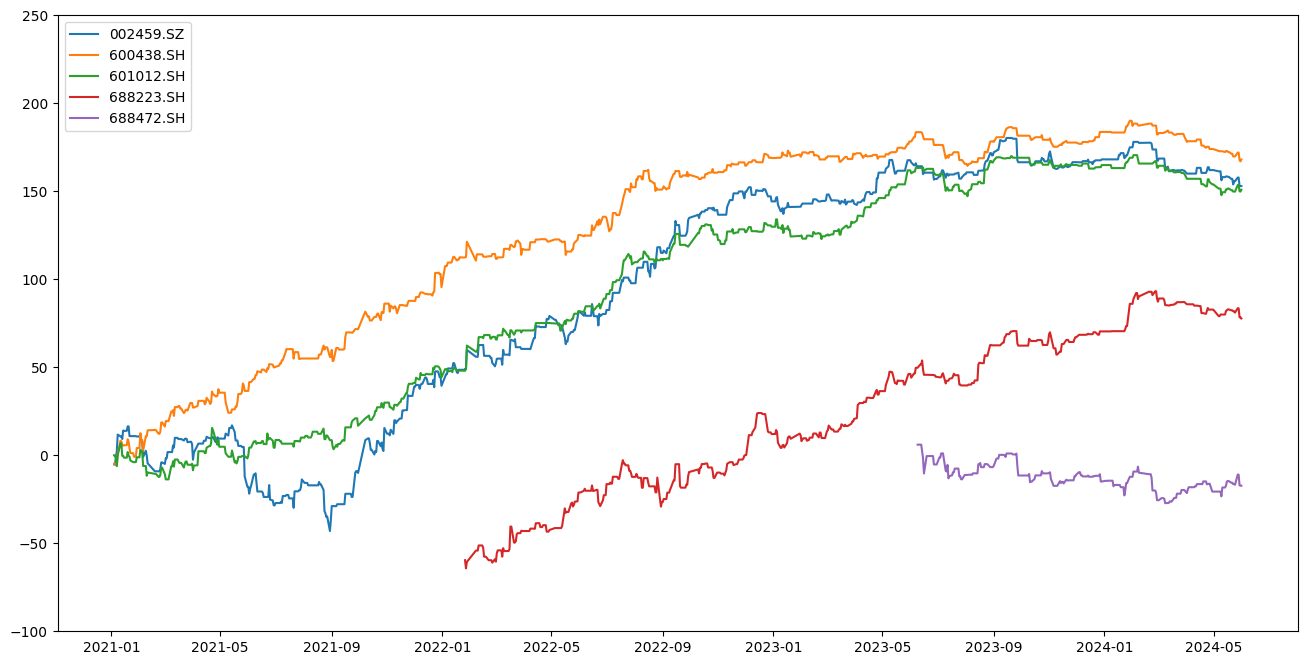

In [64]:
def strat6(df: pd.DataFrame) -> pd.Series:
    def _strat(x: pd.DataFrame) -> pd.Series:
        gap = x['Gap']
        index_gap = x['IndexGap']

        if gap > 0:
            if index_gap > 0:
                return -1
            else:
                return 0
        elif gap < 0:
            if index_gap < 0:
                return 1
            else:
                return 0
        else:
            return 1
    
    return df[['Gap', 'IndexGap']].apply(_strat, axis=1)

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'IndexGap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]

draw_with_backtest(d.groupby('ticker'), strat6)

In [65]:
d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'IndexGap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]

gap_pos_index_pos_count = d[(d['Gap'] > 0) & (d['IndexGap'] > 0)].__len__()
gap_pos_count = d[(d['Gap'] > 0)].__len__()
gap_pos_index_pos_ratio = gap_pos_index_pos_count / gap_pos_count
gap_pos_index_neg_ratio = 1 - gap_pos_index_pos_ratio

gap_neg_index_neg_count = d[(d['Gap'] < 0) & (d['IndexGap'] < 0)].__len__()
gap_neg_count = d[(d['Gap'] < 0)].__len__()
gap_neg_index_neg_ratio = gap_neg_index_neg_count / gap_neg_count
gap_neg_index_pos_ratio = 1 - gap_neg_index_neg_ratio

print('gap_pos_index_pos_count:', gap_pos_index_pos_count)
print('gap_pos_count:', gap_pos_count)
print('gap_pos_index_pos_ratio:', gap_pos_index_pos_ratio)
print('gap_neg_index_neg_count:', gap_neg_index_neg_count)
print('gap_neg_count:', gap_neg_count)
print('gap_neg_index_neg_ratio:', gap_neg_index_neg_ratio)

gap_pos_index_pos_count: 775
gap_pos_count: 1292
gap_pos_index_pos_ratio: 0.5998452012383901
gap_neg_index_neg_count: 1364
gap_neg_count: 1747
gap_neg_index_neg_ratio: 0.7807670291929021


### Normalizing for a Meaningful Comparison

In order to have meaningful comparison with strategy 1, which the amount of investment (either short or long) is alway 1 unit per day.

We need to normalize the amount of investment in this new strategy to also be always 1 per day.

The amount of money spent on strategy 1 should = amount of money spent on other strategies => meaningful comparison on the deicision of short or long.

In previous 2 strategies, the amount of investment may be less than 1 per day.

In following strategies, I will adjust the amount spent for the previous 2 strategies.

For example in strat 6, given $\text{gap > 0}$, we spend 0 if $\text{index gap} \le 0$, and we need to solve for the amount we should spend ($x$) when $\text{index gap} > 0$

Given that we can find $P$:
$$P = \frac{(\text{index gap} > 0) \wedge (\text{gap} > 0)}{(\text{gap} > 0)}$$

$x$ can be found by:
$$
\begin{aligned}
1 &= P \times x + (1 - P) \times 0 \\
x &= \frac{1}{P}
\end{aligned}
$$

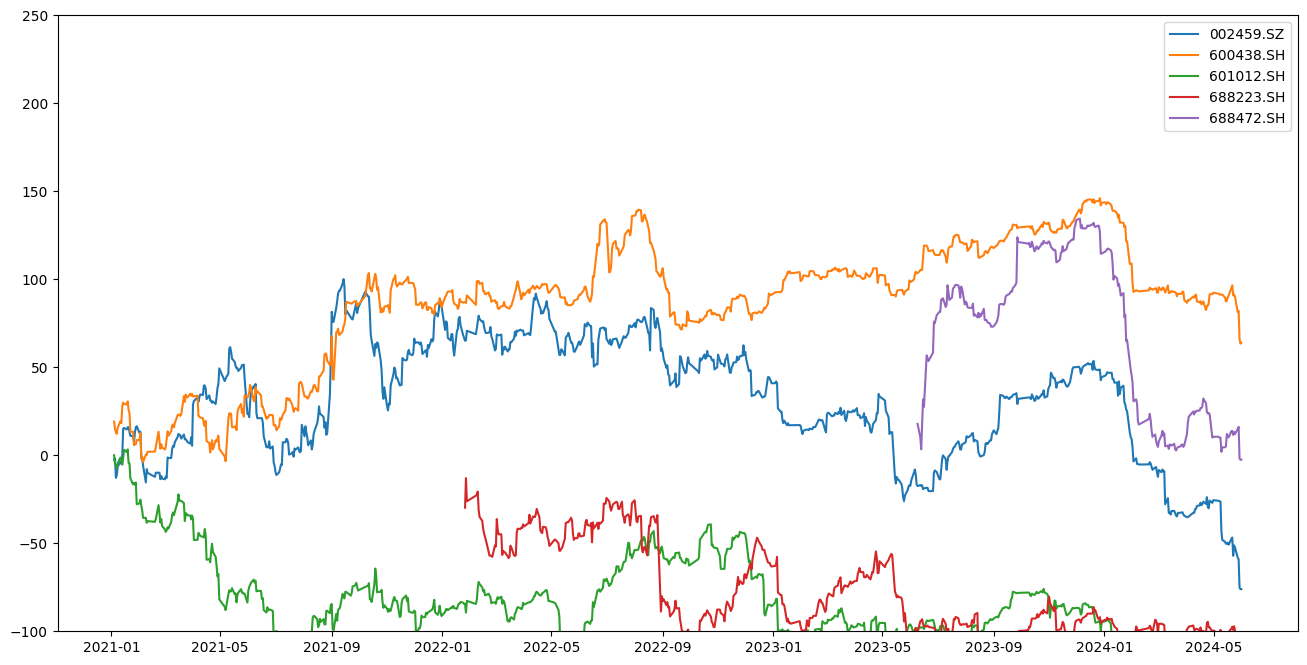

In [115]:
def strat7(df: pd.DataFrame) -> pd.Series:
    gap_pos_index_neg_count = df[(df['Gap'] > 0) & (df['IndexGap'] <= 0)].__len__()
    gap_pos_count = df[(df['Gap'] > 0)].__len__()
    gap_pos_index_neg_ratio = gap_pos_index_neg_count / gap_pos_count

    gap_neg_index_pos_count = df[(df['Gap'] < 0) & (df['IndexGap'] >= 0)].__len__()
    gap_neg_count = df[(df['Gap'] < 0)].__len__()
    gap_neg_index_pos_ratio = gap_neg_index_pos_count / gap_neg_count

    def _strat(x: pd.DataFrame) -> pd.Series:
        gap = x['Gap']
        index_gap = x['IndexGap']

        if gap > 0:
            if index_gap <= 0:
                return -1 / gap_pos_index_neg_ratio
            else:
                return -0
        elif gap < 0:
            if index_gap >= 0:
                return 1 / gap_neg_index_pos_ratio
            else:
                return 0
        else:
            return 1
    
    return df[['Gap', 'IndexGap']].apply(_strat, axis=1)

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'IndexGap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]

draw_with_backtest(d.groupby('ticker'), strat7)

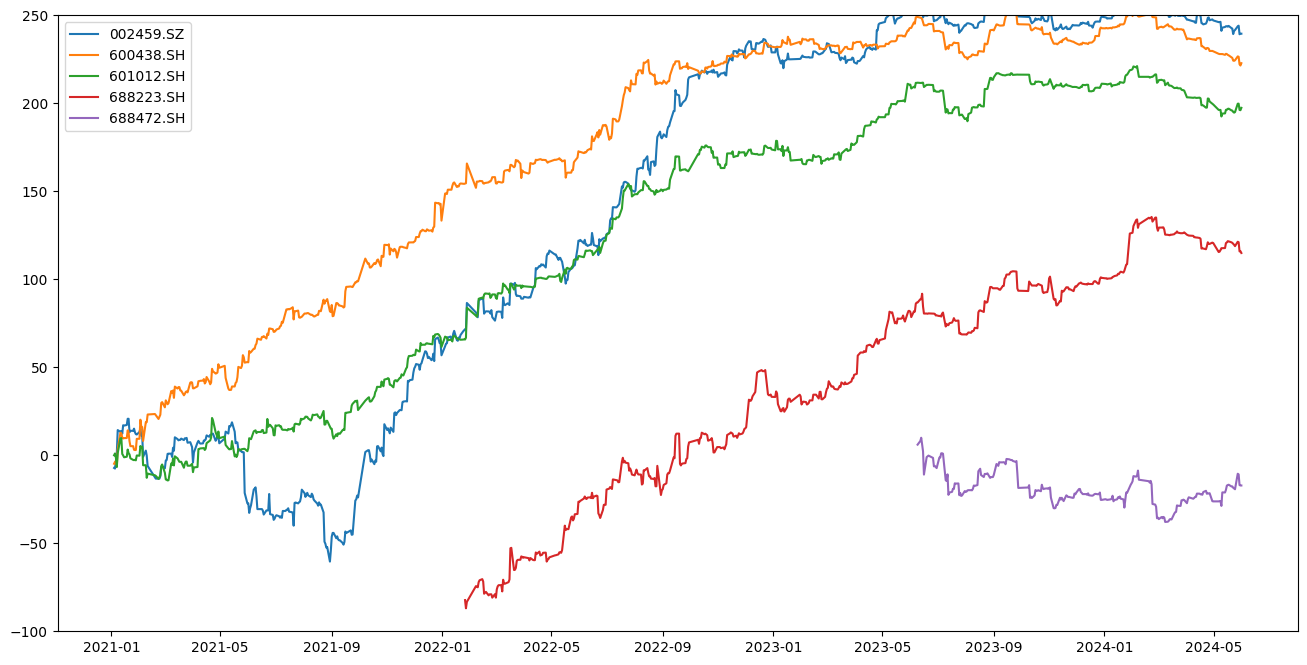

In [114]:
def strat8(df: pd.DataFrame) -> pd.Series:
    gap_pos_index_pos_count = df[(df['Gap'] > 0) & (df['IndexGap'] > 0)].__len__()
    gap_pos_count = df[(df['Gap'] > 0)].__len__()
    gap_pos_index_pos_ratio = gap_pos_index_pos_count / gap_pos_count

    gap_neg_index_neg_count = df[(df['Gap'] < 0) & (df['IndexGap'] < 0)].__len__()
    gap_neg_count = df[(df['Gap'] < 0)].__len__()
    gap_neg_index_neg_ratio = gap_neg_index_neg_count / gap_neg_count
    
    def _strat(x: pd.DataFrame) -> pd.Series:
        gap = x['Gap']
        index_gap = x['IndexGap']

        if gap > 0:
            if index_gap > 0:
                return -1 / gap_pos_index_pos_ratio
            else:
                return 0
        elif gap < 0:
            if index_gap < 0:
                return 1 / gap_neg_index_neg_ratio
            else:
                return 0
        else:
            return 1
    
    return df[['Gap', 'IndexGap']].apply(_strat, axis=1)

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'IndexGap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]

draw_with_backtest(d.groupby('ticker'), strat8)

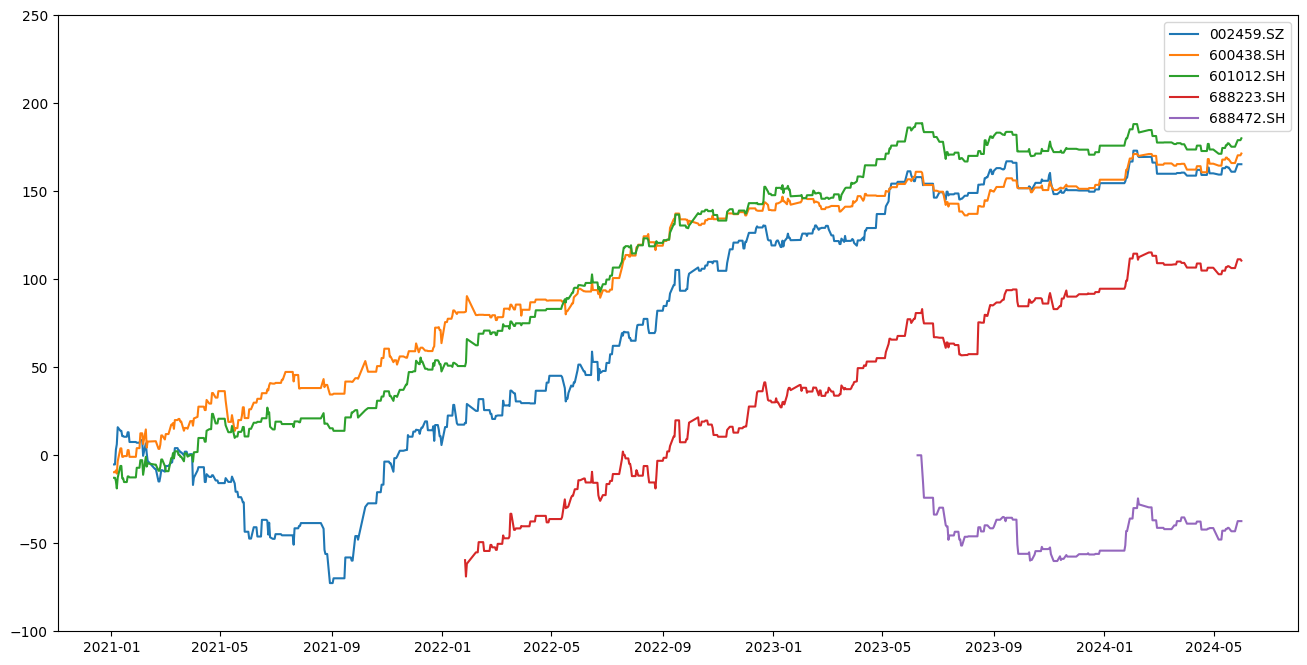

In [68]:
def strat9(df: pd.DataFrame) -> pd.Series:
    def _strat(x: pd.DataFrame) -> pd.Series:
        gap = x['Gap']
        index_gap = x['IndexGap']

        if index_gap > 0:
            return -1
        elif index_gap < 0:
            return 1
        else:
            return 1
    
    return df[['Gap', 'IndexGap']].apply(_strat, axis=1)

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'IndexGap', 'AccChangeRatio']]

d = d[
    (d['Sector'] == 'Photovoltaic') &
    (d['Time'] == dt.time(hour=10, minute=00))
]

draw_with_backtest(d.groupby('ticker'), strat9)

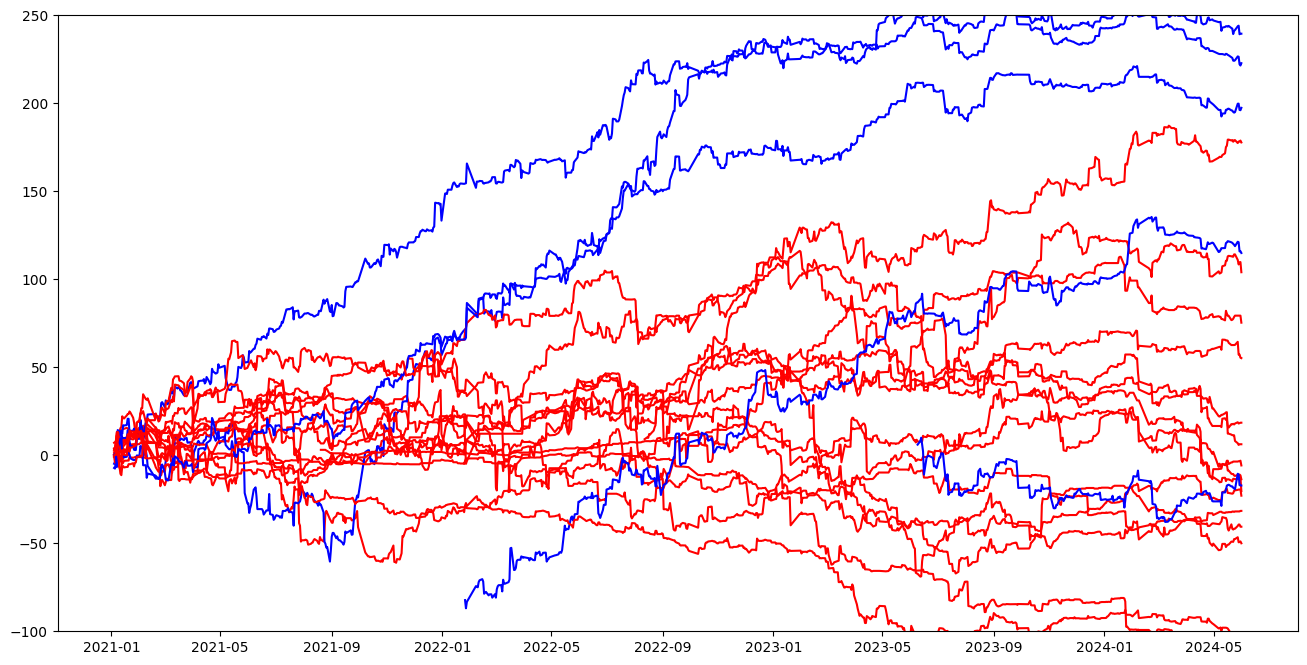

In [124]:
def strat8_comparisons(df: pd.DataFrame) -> pd.Series:
    gap_pos_index_pos_count = df[(df['Gap'] > 0) & (df['IndexGap'] > 0)].__len__()
    gap_pos_count = df[(df['Gap'] > 0)].__len__()
    gap_pos_index_pos_ratio = gap_pos_index_pos_count / gap_pos_count
    gap_pos_index_neg_ratio = 1 - gap_pos_index_pos_ratio

    gap_neg_index_neg_count = df[(df['Gap'] < 0) & (df['IndexGap'] < 0)].__len__()
    gap_neg_count = df[(df['Gap'] < 0)].__len__()
    gap_neg_index_neg_ratio = gap_neg_index_neg_count / gap_neg_count
    gap_neg_index_pos_ratio = 1 - gap_neg_index_neg_ratio
    
    def _strat(x: pd.DataFrame) -> pd.Series:
        gap = x['Gap']
        index_gap = x['IndexGap']

        if gap > 0:
            if index_gap > 0:
                return -1 / gap_pos_index_pos_ratio
            else:
                return 0
        elif gap < 0:
            if index_gap < 0:
                return 1 / gap_neg_index_neg_ratio
            else:
                return 0
        else:
            return 1
    
    return df[['Gap', 'IndexGap']].apply(_strat, axis=1)

d = data[['ticker', 'Sector', 'TradingDay', 'Time', 'Gap', 'IndexGap', 'AccChangeRatio']]

d = d[
    (d['Time'] == dt.time(hour=10, minute=00))
]

draw_with_backtest(
    d.groupby('ticker'),
    strat8_comparisons,
    get_color=lambda t: 'blue' if t in photovoltaic_tickers else 'red',
    has_legend=False
)